# Project TSDN

## Project Title

**Real-Time Cyber Threat Detection and Prevention with Cutting-Edge AI-Powered Web Attack Monitoring** Dalam bahasa indonesia "***deteksi dan pencegahan ancaman siber secara real-time dengan memanfaatkan teknologi AI terkini untuk memonitor serangan web***".
<br><br>
Dataset dalam projek ini diambil dari Kaggle pada  link https://www.kaggle.com/datasets/evg3n1j/httpparamsdataset

## Project Description

Projek ini dibuat untuk membantu mengamankan web dari serangan cyber. Cara kerja Projek ini adalah dengan cara mendeteksi serangan SQL Injection, XSS, CMDI, Path Traversal dan XSS yang biasanya merak terjadi pada banyak situs. Projek ini juga akan dilengkapi dengan Monitoring keamanan secara realtime lebih lengkap tentang projek ini dibahas di proposal project

Berikut ini adalah Inscope dan outscope project yang dikerjakan :

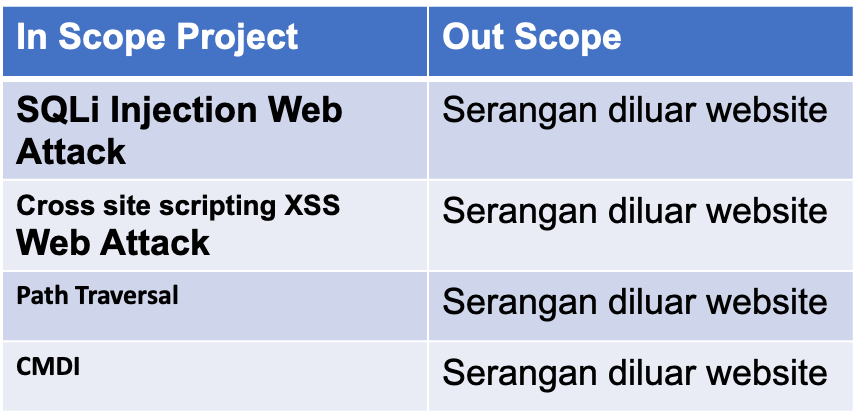

## Bussiness Understanding
Ancaman dan serangan pada website masih sangat sering terjadi karena memang menjadi target sasaran termudah bagi pelaku kejahatan, kominfo sendiri dalam artikel website resminya mengumumkan sebanyak 50%  dari situs pemerintah diserang hacker (https://www.kominfo.go.id/content/detail/1493/50-persen-situs-pemerintah-diserang-hacker/0/berita).



# Import Library

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 847.9 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import chardet
import seaborn as sns
import plotly.express as px

from unidecode import unidecode
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import joblib

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import TruncatedSVD

from sklearn.model_selection import  cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Understanding

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Read the data

In [ ]:
#Detect encoding type
data = '/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/Data'

with open(data+'/payload_full.csv','rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
data = pd.read_csv(data+'/payload_full.csv',encoding='ascii')

In [ ]:
data.head()

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm


# Explanotory Data Analist

### Liat Data Profiling

In [ ]:
data.dtypes

payload        object
length          int64
attack_type    object
label          object
dtype: object

In [ ]:
data.isna().sum()

payload        0
length         0
attack_type    0
label          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31067 entries, 0 to 31066
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payload      31067 non-null  object
 1   length       31067 non-null  int64 
 2   attack_type  31067 non-null  object
 3   label        31067 non-null  object
dtypes: int64(1), object(3)
memory usage: 971.0+ KB


In [ ]:
data.head()

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm


In [ ]:
data.attack_type.unique()

array(['norm', 'sqli', 'xss', 'cmdi', 'path-traversal'], dtype=object)

### Cek jumlah data

In [ ]:
data.shape

(31067, 4)

### Cek distribusi label injected vs not injected

In [ ]:
fig = px.histogram(data['attack_type'], barmode='group', title='Distribusi Kelas A, B, dan C')
fig.update_layout(xaxis_title='Nilai', yaxis_title='Frekuensi')
fig.show()

# Data Preparation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31067 entries, 0 to 31066
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payload      31067 non-null  object
 1   length       31067 non-null  int64 
 2   attack_type  31067 non-null  object
 3   label        31067 non-null  object
dtypes: int64(1), object(3)
memory usage: 971.0+ KB


In [ ]:
data.isnull().sum()

payload        0
length         0
attack_type    0
label          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
# data.drop_duplicates(inplace=True)

## Remove Kolom Yang tidak dibutuhkan

In [ ]:
# Hapus kolom label karena bisa menggunakan kolo attack_type
data.drop(['label','length'], axis=1, inplace=True)

In [ ]:
data

,payload,attack_type
0,c/ caridad s/n,norm
1,"campello, el",norm
2,40184,norm
3,1442431887503330,norm
4,nue37,norm
...,...,...
31062,"<script a="">"" id=xss src=""http://ha.ckers.org/...",xss
31063,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",xss
31064,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",xss
31065,"<script a=`>` id=xss src=""http://ha.ckers.org/...",xss


In [ ]:
data.nunique()

payload        31067
attack_type        5
dtype: int64

## Change Data Typpe

## Encode Variable Output

In [ ]:
labelencoder = LabelEncoder()
data['Label'] = labelencoder.fit_transform(data['attack_type'])

In [ ]:
data

,payload,attack_type,Label
0,c/ caridad s/n,norm,1
1,"campello, el",norm,1
2,40184,norm,1
3,1442431887503330,norm,1
4,nue37,norm,1
...,...,...,...
31062,"<script a="">"" id=xss src=""http://ha.ckers.org/...",xss,4
31063,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",xss,4
31064,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",xss,4
31065,"<script a=`>` id=xss src=""http://ha.ckers.org/...",xss,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31067 entries, 0 to 31066
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payload      31067 non-null  object
 1   attack_type  31067 non-null  object
 2   Label        31067 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 728.3+ KB


In [ ]:
unique_values = data[["attack_type", "Label"]].drop_duplicates()

# Tampilkan nilai unik
print(unique_values)

         attack_type  Label
0               norm      1
436             sqli      3
941              xss      4
9779            cmdi      0
9902  path-traversal      2


## Vectorization

In [ ]:
data.to_csv('/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib/datadimention.csv')

In [ ]:
# X = data['payload']
# y = data['Label']
# vectorizer = TfidfVectorizer()
# X_tfidf = vectorizer.fit_transform(X)

In [ ]:
X = data['payload']
y = data['Label']
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X_tfidf = vectorizer.fit_transform(X.values.astype('U')).toarray()

## Handling Imbalance Data

Pada tahap Explanotory data analisis pada visualisasi dg plot, kita dapat melihat bahwa terdapat data yang inbalace, sehingga perlu dilakukan inbalancing treatmen, Kami akan mencoba menyeimbangkan data kami menggunakan SMOTE kemudian melakukan klasifikasi

In [ ]:
# y_array = np.array(y)

In [ ]:
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [ ]:
X_resampled, y_resampled = oversample.fit_resample(X_tfidf, y)

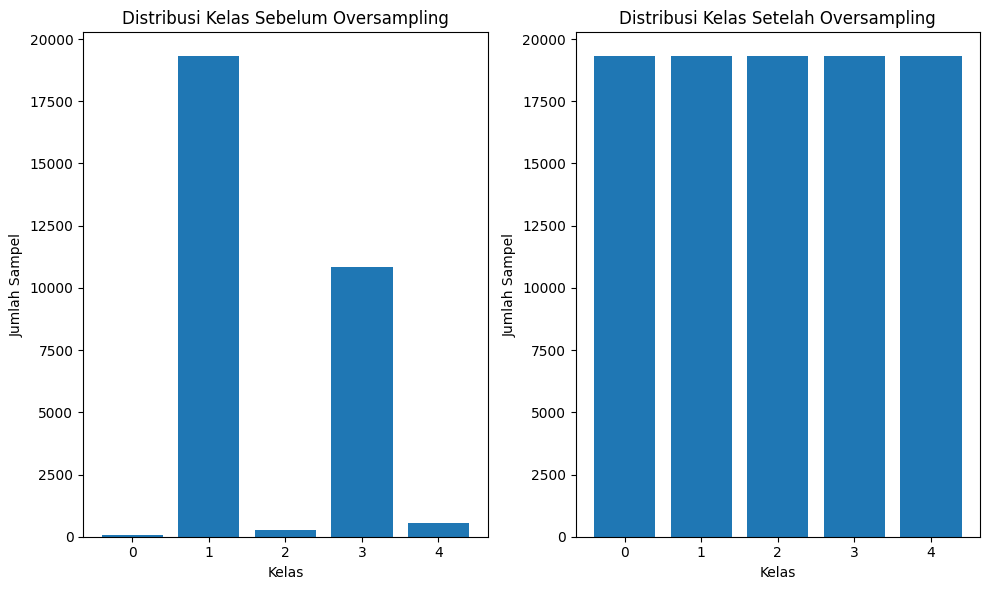

In [ ]:
# Menghitung jumlah sampel untuk setiap kelas sebelum oversampling
before_oversampling = data['Label'].value_counts()

# Menghitung jumlah sampel untuk setiap kelas setelah oversampling
after_oversampling = pd.Series(y_resampled).value_counts()

# Plotting histogram atau barplot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(before_oversampling.index, before_oversampling.values)
plt.title('Distribusi Kelas Sebelum Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')

plt.subplot(1, 2, 2)
plt.bar(after_oversampling.index, after_oversampling.values)
plt.title('Distribusi Kelas Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')

plt.tight_layout()
plt.show()

# Modeling

## Bagi Data Train dan Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(77216, 5881)
(77216,)
(19304, 5881)
(19304,)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(77216, 5881)
(19304, 5881)


In [ ]:
# pca = PCA(n_components=500, svd_solver='randomized')
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

## Pemilihan Model

In [ ]:
#Kami sudah melakukan UJI dengan KNN namun dengan dimensi data yang ada memiliki waktu fit dan predict sangat
#lama diatas 2 jam meskipun sudah di ubah banyak parameter

models = [
    LogisticRegression(solver='saga', max_iter=100),
    # KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=50, n_jobs=-1),  # Gunakan n_jobs=-1 untuk KNeighborsClassifier
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=3),
    AdaBoostClassifier(n_estimators=50, learning_rate=1)
]


modellabel = [
    'LogisticRegression',
    # 'KNeighborsClassifier',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier'
]


In [ ]:
for i, model in enumerate(models):
  start_time = time.time()
  model.fit(X_train,y_train)
  prediction_test = model.predict(X_test)
  end_time = time.time()
  print('Model {0}'.format(modellabel[i]))
  print('Time taken to train and predict: {:.4f} seconds'.format(end_time - start_time))
  print('Accuracy of classifier train data: {:.3f}'.format(model.score(X_train, y_train)))
  print('Accuracy ofclassifier test data: {:.3f}'.format(model.score(X_test, y_test)))
  print(metrics.classification_report(y_test, prediction_test))
  print('---------------------------------')

Model LogisticRegression
Time taken to train and predict: 414.4045 seconds
Accuracy of classifier train data: 0.985
Accuracy ofclassifier test data: 0.980
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3982
           1       0.91      1.00      0.95      3768
           2       1.00      1.00      1.00      3825
           3       1.00      0.95      0.97      3876
           4       1.00      0.99      1.00      3853

    accuracy                           0.98     19304
   macro avg       0.98      0.98      0.98     19304
weighted avg       0.98      0.98      0.98     19304

---------------------------------
Model DecisionTreeClassifier
Time taken to train and predict: 40.1849 seconds
Accuracy of classifier train data: 0.771
Accuracy ofclassifier test data: 0.768
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      3982
           1       0.46      1.00      0.63      3768
 

Dari hasil yang ada model Logistic Regression dan AdaBoost Classifier memberikan kinerja yang baik dengan akurasi yang tinggi di kedua data train dan test, serta nilai f1-score yang cukup baik di semua kelas.

Namun, dalam kasus deteksi SQL Injection dan XSS, penting untuk mempertimbangkan keseimbangan antara precision (presisi) dan recall. Recall yang tinggi penting untuk mengidentifikasi sebanyak mungkin kasus yang positif benar (true positive), sementara precision penting untuk memastikan bahwa kasus yang dideteksi sebagai positif benar-benar relevan.

Dari hasil evaluasi:
Logistic Regression:

Menunjukkan akurasi yang tinggi di kedua data train dan test.
Menunjukkan presisi dan recall yang baik di semua kelas.
Waktu pelatihan dan prediksi yang lumayan cepat.
AdaBoost Classifier:

Memberikan akurasi yang tinggi di kedua data train dan test.
Menunjukkan presisi dan recall yang baik di semua kelas.
Waktu pelatihan dan prediksi lebih lama daripada Logistic Regression. Berdasarkan pertimbangkan tersebut tim memilih logistic regression

## Pemilihan Model Mechine Leaning

In [ ]:
model = LogisticRegression(solver='saga', max_iter=100)
model.fit(X_train,y_train)

# Make predictions
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9802113551595524


In [ ]:
print('Accuracy of classifier train data: {:.3f}'.format(model.score(X_train, y_train)))
print('Accuracy ofclassifier test data: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of classifier train data: 0.985
Accuracy ofclassifier test data: 0.980


# Evaluation

## Check Clasification Report

In [ ]:
print(metrics.classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3982
           1       0.91      1.00      0.95      3768
           2       1.00      1.00      1.00      3825
           3       1.00      0.95      0.97      3876
           4       1.00      0.99      1.00      3853

    accuracy                           0.98     19304
   macro avg       0.98      0.98      0.98     19304
weighted avg       0.98      0.98      0.98     19304



# Deployment Model

In [ ]:
path = '/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib'

In [ ]:
# Save the model using joblib
joblib.dump(model, path+'/webscuritymodel.joblib')

['/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib/webscuritymodel.joblib']

## Test & Predict Model

In [ ]:
# Load the saved model from the HDF5 file
model_path = path+'/webscuritymodel.joblib'
loaded_model = joblib.load(model_path)

In [ ]:
loaded_prediction_test = loaded_model.predict(X_test)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': loaded_prediction_test})

# Display the results
print("Results (Loaded Model):")
print(results_df)

# Evaluate the accuracy
accuracy = metrics.accuracy_score(y_test, loaded_prediction_test)
print("Accuracy (Loaded Model):", accuracy)

Results (Loaded Model):
       Actual  Predicted
54151       2          2
35460       0          0
54350       2          2
23717       1          1
94945       4          4
...       ...        ...
17782       1          1
61062       2          2
14969       3          3
96477       4          4
22799       1          1

[19304 rows x 2 columns]
Accuracy (Loaded Model): 0.9802113551595524


In [ ]:
results_df.to_csv('resultmodel')

In [ ]:
loaded_prediction_test

array([2, 0, 2, ..., 3, 4, 1])

In [ ]:
y_test

## Create Function to Deployment

Ini adalah function yang nanti akan disimpan di API server

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [ ]:
# Load the saved model from the HDF5 file
path = '/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib'
model_path = path+'/webscuritymodel.joblib'
loaded_model = joblib.load(model_path)
data = pd.read_csv(path+'/datadimention.csv')

##Predict New Text

In [ ]:
sentence_inject = '<script <b>=alert("xss");"></script>'

In [ ]:
query = sentence_inject
X = data['payload']
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, stop_words='english')
X_tfidf = vectorizer.fit_transform(X.values.astype('U')).toarray()
# Vectorize the input using the same vectorizer used during training
query_vectorized = vectorizer.transform([query])

# Make predictions
prediction = loaded_model.predict(query_vectorized)[0]

In [ ]:
print(prediction)

4


|attack_type|Label|
|-----|-----|
|norm|1|
|sqli|3|
|xss|4|
|cmdi|0|
|path-traversal|2|